<a href="https://colab.research.google.com/github/ShrirangGodbole2003/CNN_projects/blob/main/Copy_of_ButterflyCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME']="shriranggodbole"
os.environ['KAGGLE_KEY']="46e89536395376321cdc0c8b6da05cc2" 
!kaggle datasets download -d gpiosenka/butterfly-images40-species

butterfly-images40-species.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "/content/butterfly-images40-species.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import warnings
warnings.filterwarnings('ignore')
data_dir_list=os.listdir("/content/train")
print(data_dir_list)
path,dirs,files=next(os.walk("/content/train"))
file_count=len(files)

['CLEOPATRA', 'SCARCE SWALLOW', 'CABBAGE WHITE', 'SOOTYWING', 'RED POSTMAN', 'GOLD BANDED', 'BROWN SIPROETA', 'APPOLLO', 'AMERICAN SNOOT', 'RED CRACKER', 'BANDED ORANGE HELICONIAN', 'ELBOWED PIERROT', 'TWO BARRED FLASHER', 'MONARCH', 'JULIA', 'SOUTHERN DOGFACE', 'SLEEPY ORANGE', 'PINE WHITE', 'CLODIUS PARNASSIAN', 'ULYSES', 'ORANGE OAKLEAF', 'LARGE MARBLE', 'ORANGE TIP', 'POPINJAY', 'RED ADMIRAL', 'VICEROY', 'STRAITED QUEEN', 'SILVER SPOT SKIPPER', 'CRIMSON PATCH', 'EASTERN PINE ELFIN', 'EASTERN COMA', 'PURPLE HAIRSTREAK', 'COMMON BANDED AWL', 'EASTERN DAPPLE WHITE', 'PIPEVINE SWALLOW', 'MANGROVE SKIPPER', 'GREEN CELLED CATTLEHEART', 'AFRICAN GIANT SWALLOWTAIL', 'ZEBRA LONG WING', 'MOURNING CLOAK', 'IPHICLUS SISTER', 'MESTRA', 'DANAID EGGFLY', 'GREY HAIRSTREAK', 'PAINTED LADY', 'METALMARK', 'CAIRNS BIRDWING', 'MILBERTS TORTOISESHELL', 'RED SPOTTED PURPLE', 'MALACHITE', 'TROPICAL LEAFWING', 'COPPER TAIL', 'BANDED PEACOCK', 'QUESTION MARK', 'INDRA SWALLOW', 'CHESTNUT', 'BLUE MORPHO', 'AN

In [ ]:
import os
import numpy as np
import shutil
import random

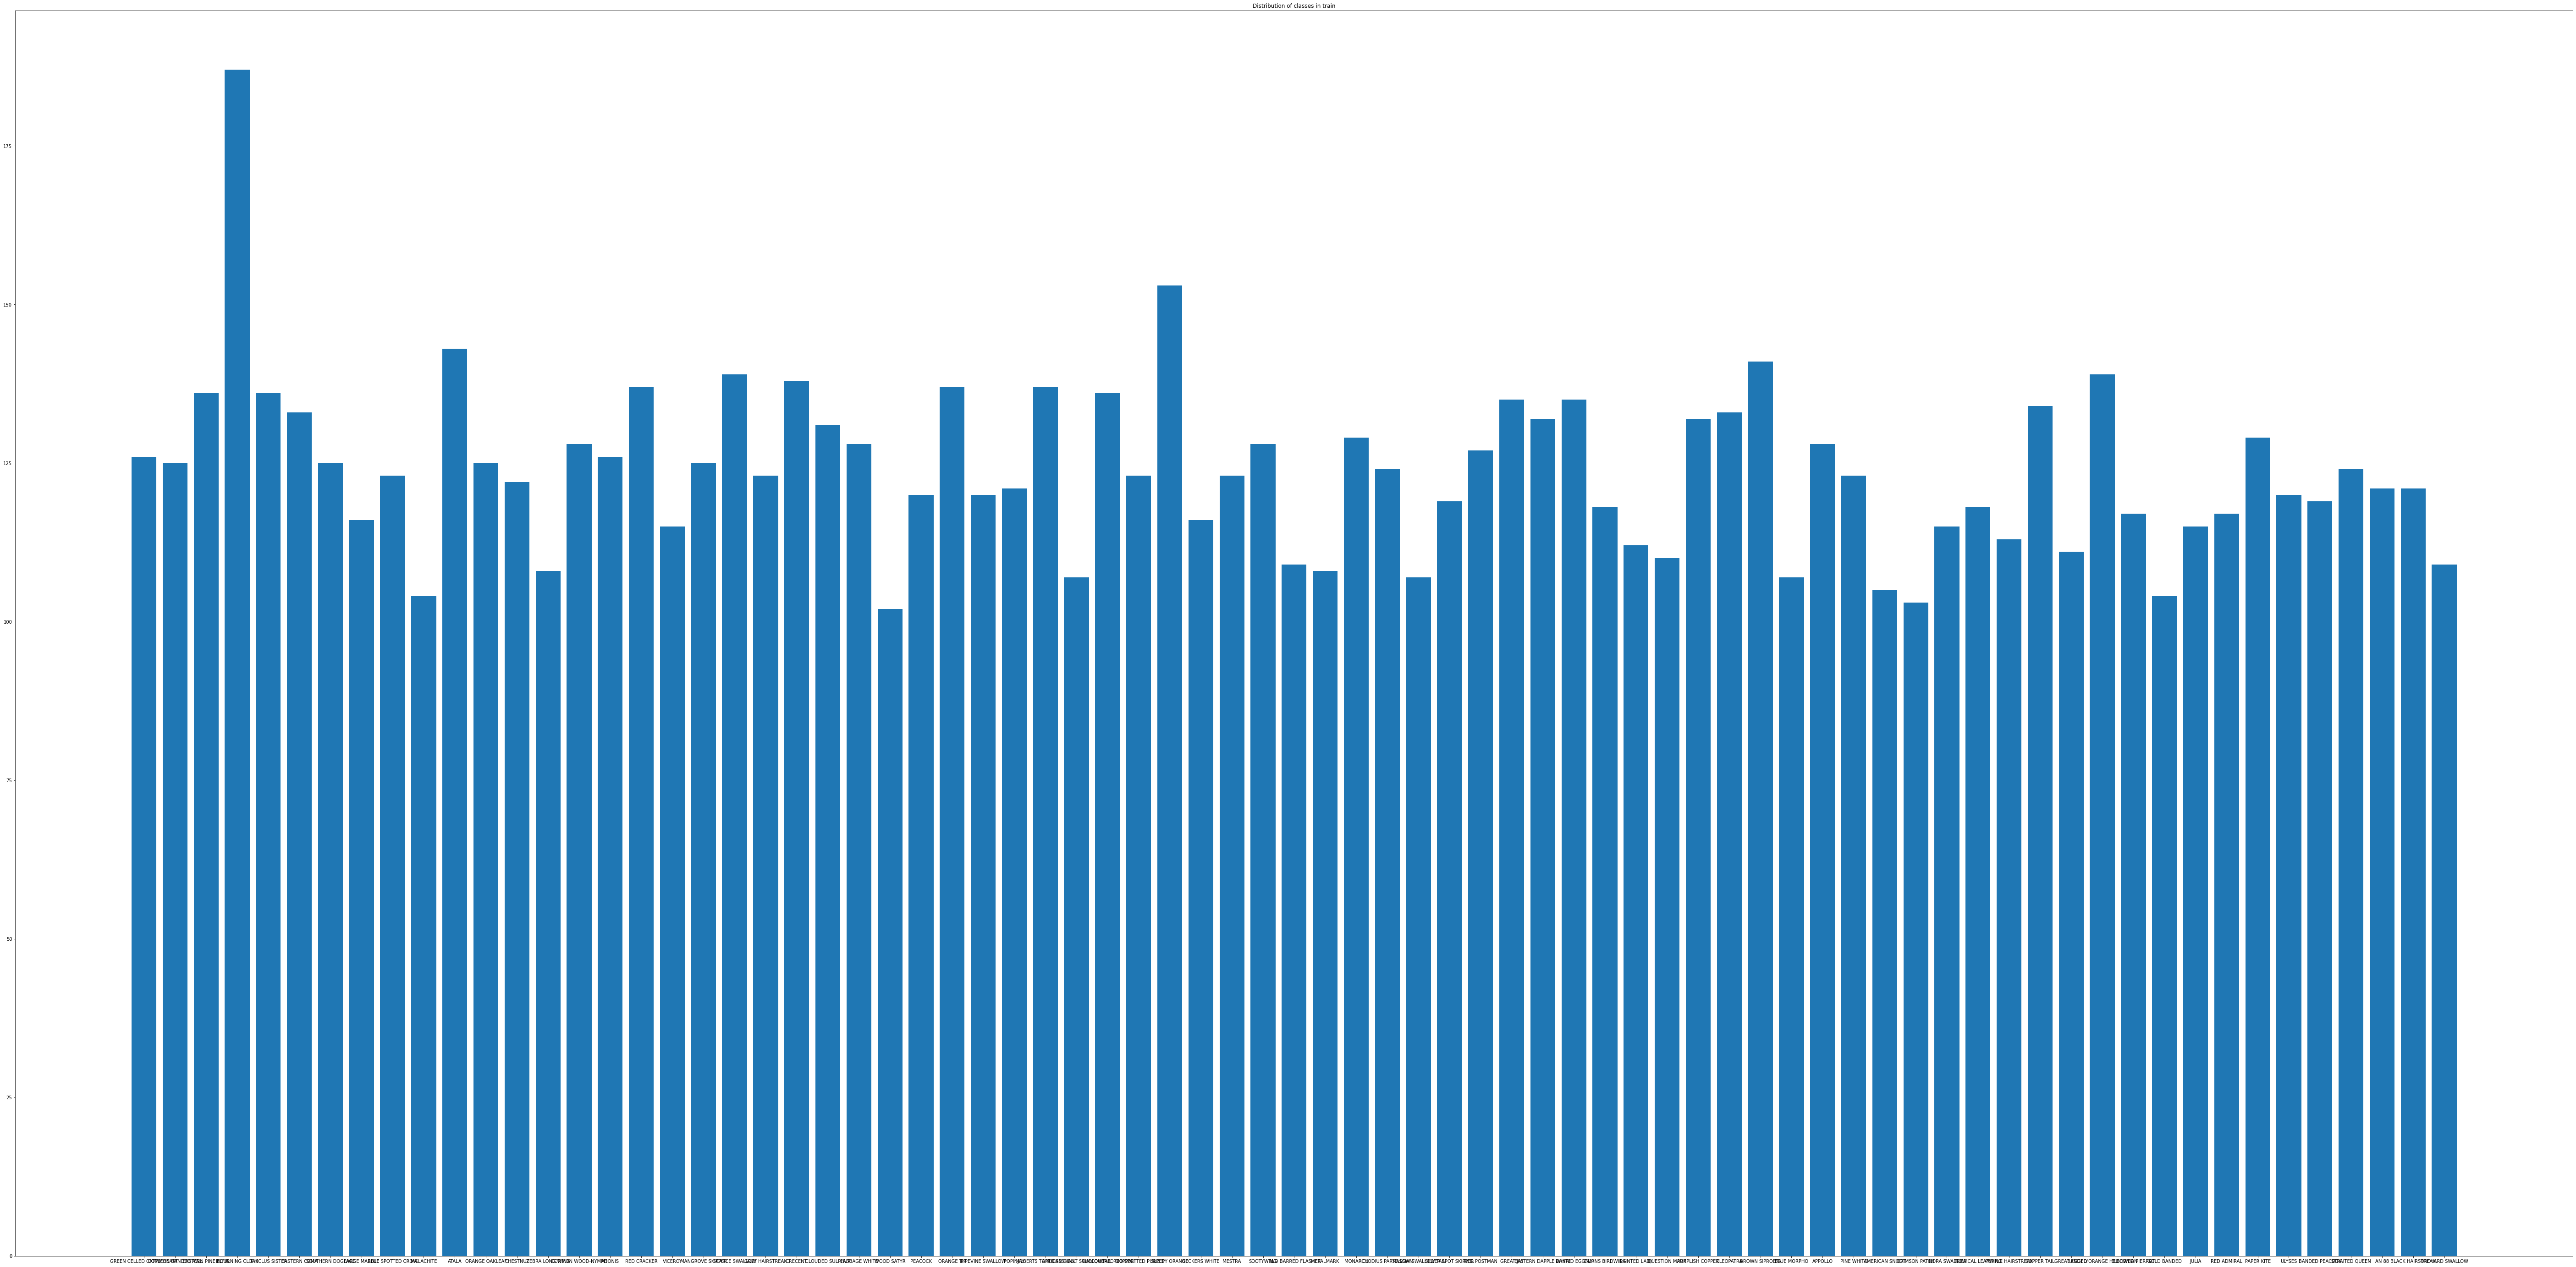

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.image import imread
import pathlib


image_folder=['GREEN CELLED CATTLEHEART', 'COMMON BANDED AWL', 'EASTERN PINE ELFIN', 'MOURNING CLOAK', 'IPHICLUS SISTER', 'EASTERN COMA', 'SOUTHERN DOGFACE', 'LARGE MARBLE', 'BLUE SPOTTED CROW', 'MALACHITE', 'ATALA', 'ORANGE OAKLEAF', 'CHESTNUT', 'ZEBRA LONG WING', 'COMMON WOOD-NYMPH', 'ADONIS', 'RED CRACKER', 'VICEROY', 'MANGROVE SKIPPER', 'SCARCE SWALLOW', 'GREY HAIRSTREAK', 'CRECENT', 'CLOUDED SULPHUR', 'CABBAGE WHITE', 'WOOD SATYR', 'PEACOCK', 'ORANGE TIP', 'PIPEVINE SWALLOW', 'POPINJAY', 'MILBERTS TORTOISESHELL', 'AFRICAN GIANT SWALLOWTAIL', 'CHECQUERED SKIPPER', 'RED SPOTTED PURPLE', 'SLEEPY ORANGE', 'BECKERS WHITE', 'MESTRA', 'SOOTYWING', 'TWO BARRED FLASHER', 'METALMARK', 'MONARCH', 'CLODIUS PARNASSIAN', 'YELLOW SWALLOW TAIL', 'SILVER SPOT SKIPPER', 'RED POSTMAN', 'GREAT JAY', 'EASTERN DAPPLE WHITE', 'DANAID EGGFLY', 'CAIRNS BIRDWING', 'PAINTED LADY', 'QUESTION MARK', 'PURPLISH COPPER', 'CLEOPATRA', 'BROWN SIPROETA', 'BLUE MORPHO', 'APPOLLO', 'PINE WHITE', 'AMERICAN SNOOT', 'CRIMSON PATCH', 'INDRA SWALLOW', 'TROPICAL LEAFWING', 'PURPLE HAIRSTREAK', 'COPPER TAIL', 'GREAT EGGFLY', 'BANDED ORANGE HELICONIAN', 'ELBOWED PIERROT', 'GOLD BANDED', 'JULIA', 'RED ADMIRAL', 'PAPER KITE', 'ULYSES', 'BANDED PEACOCK', 'STRAITED QUEEN', 'AN 88', 'BLACK HAIRSTREAK', 'ORCHARD SWALLOW']
nimgs={}

for i in image_folder:
  nimages=len(os.listdir('/content/train/'+i+'/'))
  nimgs[i]=nimages
plt.figure(figsize=(100,50))
plt.bar(range(len(nimgs)),list(nimgs.values()),align='center')
plt.xticks(range(len(nimgs)),list(nimgs.keys()))
plt.title("Distribution of classes in train",)
plt.show()

In [ ]:
for i in image_folder:
  print("training images of {} are: ".format(i)+ str(len(os.listdir("/content/train/"+i+"/"))))

training images of GREEN CELLED CATTLEHEART are: 126
training images of COMMON BANDED AWL are: 125
training images of EASTERN PINE ELFIN are: 136
training images of MOURNING CLOAK are: 187
training images of IPHICLUS SISTER are: 136
training images of EASTERN COMA are: 133
training images of SOUTHERN DOGFACE are: 125
training images of LARGE MARBLE are: 116
training images of BLUE SPOTTED CROW are: 123
training images of MALACHITE are: 104
training images of ATALA are: 143
training images of ORANGE OAKLEAF are: 125
training images of CHESTNUT are: 122
training images of ZEBRA LONG WING are: 108
training images of COMMON WOOD-NYMPH are: 128
training images of ADONIS are: 126
training images of RED CRACKER are: 137
training images of VICEROY are: 115
training images of MANGROVE SKIPPER are: 125
training images of SCARCE SWALLOW are: 139
training images of GREY HAIRSTREAK are: 123
training images of CRECENT are: 138
training images of CLOUDED SULPHUR are: 131
training images of CABBAGE WH

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
img_width=256
img_height=256
batch_size=32

In [ ]:
TRAINING_DIR = "/content/train"
train_datagen=ImageDataGenerator(rescale=1/255.0)
train_gen=train_datagen.flow_from_directory(TRAINING_DIR,
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            target_size=(img_height,img_width))

Found 9285 images belonging to 75 classes.


In [ ]:
VALIDATION_DIR = "/content/valid"
val_datagen=ImageDataGenerator(rescale=1/255.0)
val_gen=val_datagen.flow_from_directory(VALIDATION_DIR,
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            target_size=(img_height,img_width))

Found 375 images belonging to 75 classes.


In [ ]:
callbacks=EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='min')    #'auto'
bestmodelfile='/content/CNN_aug_best_weights.h5'
bestmodel=ModelCheckpoint(bestmodelfile,monitor='val_acc',verbose=1,save_best_only=True)

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), 
    MaxPooling2D(2, 2),
    # Dropout(0.5),
    Conv2D(32, (3, 3), activation='relu'), 
    MaxPooling2D(2, 2),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.5),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.5),
    # Conv2D(256, (3, 3), activation='relu'),
    # Conv2D(256, (3, 3), activation='relu'),
    # MaxPooling2D(2,2),
    # Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(75, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 conv2d_36 (Conv2D)          (None, 60, 60, 64)       

In [ ]:
from tensorflow import optimizers
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics =['accuracy'])

In [ ]:
history = model.fit_generator(train_gen,epochs=30,verbose=1,validation_data=val_gen,callbacks=[bestmodel])

Epoch 1/30
291/291 [==============================] - 33s 111ms/step - loss: 0.0710 - accuracy: 0.0186 - val_loss: 0.0894 - val_accuracy: 0.0427
Epoch 2/30
291/291 [==============================] - 32s 110ms/step - loss: 0.0653 - accuracy: 0.0786 - val_loss: 0.0677 - val_accuracy: 0.1733
Epoch 3/30
291/291 [==============================] - 32s 111ms/step - loss: 0.0550 - accuracy: 0.2171 - val_loss: 0.0566 - val_accuracy: 0.2747
Epoch 4/30
291/291 [==============================] - 32s 110ms/step - loss: 0.0486 - accuracy: 0.3099 - val_loss: 0.0500 - val_accuracy: 0.3333
Epoch 5/30
291/291 [==============================] - 32s 109ms/step - loss: 0.0443 - accuracy: 0.3796 - val_loss: 0.0452 - val_accuracy: 0.4080
Epoch 6/30
291/291 [==============================] - 32s 109ms/step - loss: 0.0407 - accuracy: 0.4353 - val_loss: 0.0397 - val_accuracy: 0.4640
Epoch 7/30
291/291 [==============================] - 32s 109ms/step - loss: 0.0375 - accuracy: 0.4854 - val_loss: 0.0371 - val_ac

In [ ]:
# loss 0.0316
# accuracy 0.5777 for 10 epochs

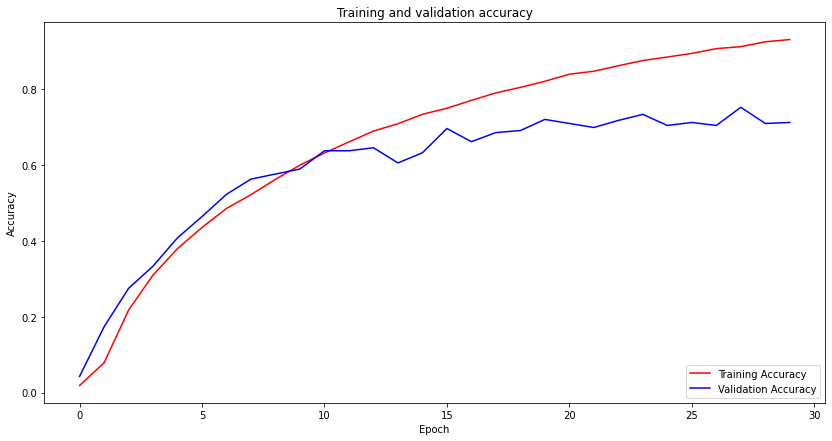

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()